# ELABORATIONS OF THE EXECUTION TIMES

In this notebook we are elaborating the time data for the strong scalability. All this time data are computed on a complex domain $[-2.75,1.25]\times[-2,2]$ with a grid of 1600 pixel per axis and with a maximum number of iterations equal to 30000. For each pixel the point used to compute the Mandelbrot series is the center of it. This problem is solved repeatly (10 times) starting from 1 thread to 16 threads.

In [1]:
#Import some useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## USEFUL FUNCTIONS DEFINITION

Before starting to elaborate the execution time, let's define some useful function to compute statistical momentums. Each dataframe we are considering is composed by 10 runs (columns) and for each column we have the times of the threads in the first rows and then the total execution time used by the process.

**MEAN**: Fixed the number of threads, this function will compute the mean execution time of the threads. Computed the means of each run, this function will calculate the mean of these one, returning in this way the mean execution time for a thread when using that number of threads. All of this information about the runs are actually encased in the dataframes we are going to pass.

In [2]:
def MEAN(df):
    ms = np.zeros(df.shape[1],dtype=float) #Define the array of the means of the runs
    
    #Compute the mean for each run
    for j in range(df.shape[1]):
        m = 0.0 
        for i in range(df.shape[0]-1):
            m += int(df.iat[i,j])
        ms[j] = m/(df.shape[0]-1)
        
    #The grand mean is simply the mean of the means
    return np.mean(ms)

**STD**: Analogously, this function will compute, for the mean computed using the function above, the associated STD.

In [3]:
def STD(df):
    ss = np.zeros(df.shape[1],dtype=float) #Define the array of the std of the runs
    ms = np.zeros(df.shape[1],dtype=float) #Define the array of the means of the runs
    
    #Compute the mean for each run
    for j in range(df.shape[1]):
        m = 0.0
        for i in range(df.shape[0]-1):
            m += int(df.iat[i,j])
        ms[j] = m/(df.shape[0]-1)
        
    #The case with a single thread has only 1 value it has 0 std however the grand mean will have one
    #So we need to distinguish the two cases.
    if(df.shape[0]-1>1):
        #For the regular cases the grand std is given by the square root of the ratio between the sum of the variances of the runs
        #and the number of run. So we compute the variances  
        for j in range(df.shape[1]):
            s = 0.0
            for i in range(df.shape[0]-1):
                s += (int(df.iat[i,j])-ms[j])**2
            ss[j] = s/(df.shape[0]-2)
    else: #In this case the grand mean is actually a simple mean and we need to apply the classical STD.
        M = np.mean(ms)
        s = 0.0
        for j in range(df.shape[1]):
            s += (ms[j]-M)**2
        ss[0] = s
        
    #Return the std
    return np.sqrt(np.sum(ss)/df.shape[1])

**MEAN_MAX**: This mean function is used for another objective. In the last row of each dataframe we have reported the total execution time used by the process to fully run. This function will simply compute the mean value of the total time for the 10 runs.

In [4]:
def MEAN_MAX(df):
    m = 0.0
    for j in range(df.shape[1]):
        m += int(df.iat[-1,j])
        
    return m/df.shape[1]

**STD_MAX**: And similarly, this function will compute its associated STD.

In [5]:
def STD_MAX(df):
    m = 0.0
    for j in range(df.shape[1]):
        m += int(df.iat[-1,j])
    m = m/df.shape[1]
    
    #In this case the STD is computed classicaly.
    s = 0.0
    for j in range(df.shape[1]):
        s += (int(df.iat[-1,j])-m)**2
    
    return np.sqrt(s/df.shape[1])

# PARALLEL SIMPLE

Let's first check the mean execution times for the parallel simple or, in other words, for the naive parallel algorithm.

In [6]:
#Import all the files containing the times of the runs for each case.
P1 = pd.read_csv(r"parallel/1th.csv",delimiter=";",header=None) #1 thread
P2 = pd.read_csv(r"parallel/2th.csv",delimiter=";",header=None) #2 threads
P3 = pd.read_csv(r"parallel/3th.csv",delimiter=";",header=None) #3 threads
P4 = pd.read_csv(r"parallel/4th.csv",delimiter=";",header=None) #And so on...
P5 = pd.read_csv(r"parallel/5th.csv",delimiter=";",header=None)
P6 = pd.read_csv(r"parallel/6th.csv",delimiter=";",header=None)
P7 = pd.read_csv(r"parallel/7th.csv",delimiter=";",header=None)
P8 = pd.read_csv(r"parallel/8th.csv",delimiter=";",header=None)
P9 = pd.read_csv(r"parallel/9th.csv",delimiter=";",header=None)
P10 = pd.read_csv(r"parallel/10th.csv",delimiter=";",header=None)
P11 = pd.read_csv(r"parallel/11th.csv",delimiter=";",header=None)
P12 = pd.read_csv(r"parallel/12th.csv",delimiter=";",header=None)
P13 = pd.read_csv(r"parallel/13th.csv",delimiter=";",header=None)
P14 = pd.read_csv(r"parallel/14th.csv",delimiter=";",header=None)
P15 = pd.read_csv(r"parallel/15th.csv",delimiter=";",header=None)
P16 = pd.read_csv(r"parallel/16th.csv",delimiter=";",header=None)

Imported the data files, we can compute now the mean and the std of each case

In [7]:
mom = np.zeros((16,2),dtype=float) #Array of statistical momentums

#Compute the means
mom[0][0] = MEAN(P1)
mom[1][0] = MEAN(P2)
mom[2][0] = MEAN(P3)
mom[3][0] = MEAN(P4)
mom[4][0] = MEAN(P5)
mom[5][0] = MEAN(P6)
mom[6][0] = MEAN(P7)
mom[7][0] = MEAN(P8)
mom[8][0] = MEAN(P9)
mom[9][0] = MEAN(P10)
mom[10][0] = MEAN(P11)
mom[11][0] = MEAN(P12)
mom[12][0] = MEAN(P13)
mom[13][0] = MEAN(P14)
mom[14][0] = MEAN(P15)
mom[15][0] = MEAN(P16)

#Compute the std
mom[0][1] = STD(P1)
mom[1][1] = STD(P2)
mom[2][1] = STD(P3)
mom[3][1] = STD(P4)
mom[4][1] = STD(P5)
mom[5][1] = STD(P6)
mom[6][1] = STD(P7)
mom[7][1] = STD(P8)
mom[8][1] = STD(P9)
mom[9][1] = STD(P10)
mom[10][1] = STD(P11)
mom[11][1] = STD(P12)
mom[12][1] = STD(P13)
mom[13][1] = STD(P14)
mom[14][1] = STD(P15)
mom[15][1] = STD(P16)

In [8]:
#Definition of the "x" variable for the plots a.k.a. the number of threads.
threads = np.linspace(1,16,16)
print(threads)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


It is time to plot the results. Let's look firstly to the mean execution time of the threads.

<ErrorbarContainer object of 3 artists>

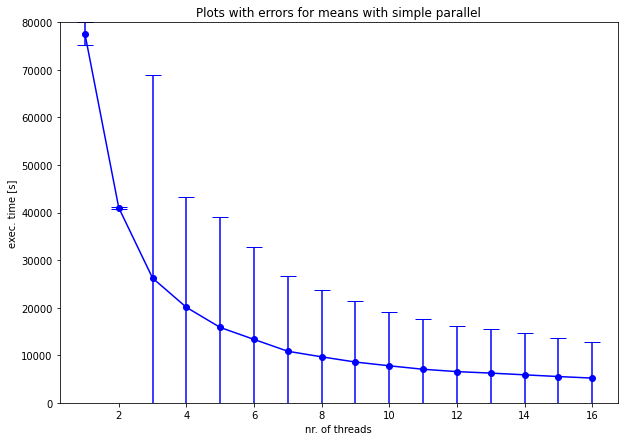

In [9]:
plt.figure(figsize=(10,7))
plt.title("Plots with errors for means with simple parallel")
plt.xlabel("nr. of threads")
plt.ylabel("exec. time [s]")
plt.plot(threads,mom[:,0],color='b')
plt.ylim(0,80000)
plt.errorbar(threads,mom[:,0],yerr=mom[:,1],fmt='o',color='blue',capsize=8)

As we can observe, the mean time for a thread moves down with an increasing number of threads. This perfectly makes sense however we can also notice how the std of each point is quite big. This means that the required time for each thread can be quite different so some of them will finish their work load in incredibly smaller time than others.

At last, we can appreciate that the execution time shrinks in a non-linear way but nimbly in the first threads and then more slowly. We can find a reason for this. When we pass from 1 thread to 2 threads we are splitting in half the job between two codes so the amount of work load for the thread is halved. However when we have 15 threads and we add another, supposing a perfect split, each one of the thread will give 1/15 of its work load so the improvement for each thread in terms of work load and time is much smaller!

So the strong scalability for the mean execution time of the threads it is quite good even if the improvements are less and less significatives with increasing number of threads.

Having this enormous std surely will affect the global execution time of the code because even if some threads require a very short time the general time required by the code depends on the worst of them.

In [10]:
maxs = np.zeros((16,2),dtype=float) #Array of statistical momentums of global times

#Compute the means
maxs[0][0] = MEAN_MAX(P1)
maxs[1][0] = MEAN_MAX(P2)
maxs[2][0] = MEAN_MAX(P3)
maxs[3][0] = MEAN_MAX(P4)
maxs[4][0] = MEAN_MAX(P5)
maxs[5][0] = MEAN_MAX(P6)
maxs[6][0] = MEAN_MAX(P7)
maxs[7][0] = MEAN_MAX(P8)
maxs[8][0] = MEAN_MAX(P9)
maxs[9][0] = MEAN_MAX(P10)
maxs[10][0] = MEAN_MAX(P11)
maxs[11][0] = MEAN_MAX(P12)
maxs[12][0] = MEAN_MAX(P13)
maxs[13][0] = MEAN_MAX(P14)
maxs[14][0] = MEAN_MAX(P15)
maxs[15][0] = MEAN_MAX(P16)

#Compute the std
maxs[0][1] = STD_MAX(P1)
maxs[1][1] = STD_MAX(P2)
maxs[2][1] = STD_MAX(P3)
maxs[3][1] = STD_MAX(P4)
maxs[4][1] = STD_MAX(P5)
maxs[5][1] = STD_MAX(P6)
maxs[6][1] = STD_MAX(P7)
maxs[7][1] = STD_MAX(P8)
maxs[8][1] = STD_MAX(P9)
maxs[9][1] = STD_MAX(P10)
maxs[10][1] = STD_MAX(P11)
maxs[11][1] = STD_MAX(P12)
maxs[12][1] = STD_MAX(P13)
maxs[13][1] = STD_MAX(P14)
maxs[14][1] = STD_MAX(P15)
maxs[15][1] = STD_MAX(P16)

<ErrorbarContainer object of 3 artists>

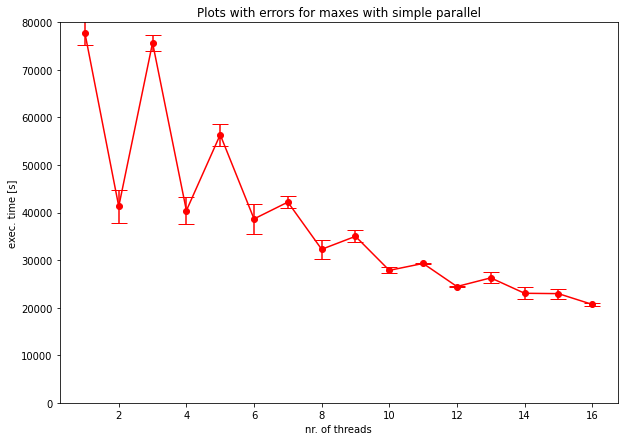

In [11]:
plt.figure(figsize=(10,7))
plt.title("Plots with errors for maxes with simple parallel")
plt.xlabel("nr. of threads")
plt.ylabel("exec. time [s]")
plt.plot(threads,maxs[:,0],color='r')
plt.ylim(0,80000)
plt.errorbar(threads,maxs[:,0],yerr=maxs[:,1],fmt='o',color='red',capsize=8)

Looking at this plot we can see that the total execution time is quite high if we look to the mean values. Moreover, there are other interesting facts:

- Firstly while the threads can have very different times the global time have a smaller std. This is reasonable because while the thread can have unbalanced work, the different processes resolve the same task so the total work load is the same. 
- Again, as the mean time becomes smaller also the maximum time shrinks even if with a slower pace. This is linked for the same reason of the non-linear behaviour of the means explained before.
- Thirdly, as we can observe the execution time is higher for an odd number of threads while for even ones is smaller. This is completely explainable: in the domain we have used the Mandelbrot region is almost at the center of the $y$ axis. Thus, when a even number of threads the central rows, the more time consuming, are splitted in half between two thread while for odd number is the burden of a single thread. Obviosly, for fewer threads the central region is assigned almost entirely for a single thread while for more threads we have that a some threads will split the burden due to the small domains of each one. However the central lines have still an important effect, in fact, the fluctuations become smaller and smaller but are still perfectly visible also for 15-16 threads.

This final reason also explain the incredibly small std associated to 2 threads in the means plot. Moreover this is actually also the cause of the big std in the means. In fact, the used algorithm splits the $y$ axis rows in regions so the thread with an external region assigned will complete their task in no time while the central one, incredibly more time consuming, will imply a much more longer computation time for the thread.

Thus, the strong scalability of the total time required by the process is far from optimal with a small improvement of the times and a fluctuating behaviour between even and odd numbers of threads.

Now we can plot the two lines together to highlight in a better way the differences of behaviour.

<ErrorbarContainer object of 3 artists>

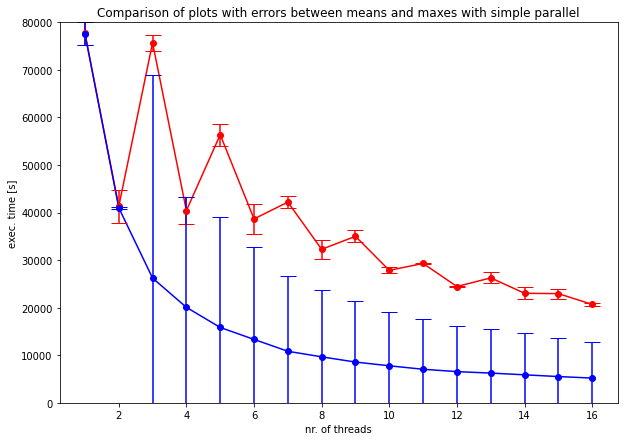

In [12]:
plt.figure(figsize=(10,7))
plt.title("Comparison of plots with errors between means and maxes with simple parallel")
plt.xlabel("nr. of threads")
plt.ylabel("exec. time [s]")
plt.plot(threads,maxs[:,0],color='r')
plt.plot(threads,mom[:,0],color='b')
plt.ylim(0,80000)
plt.errorbar(threads,maxs[:,0],yerr=maxs[:,1],fmt='o',color='red',capsize=8)
plt.errorbar(threads,mom[:,0],yerr=mom[:,1],fmt='o',color='blue',capsize=8)

As expected, the total time line (red) follows the mean thread however this tells us that the time to resolve the problem is far bigger than the average time of the thread. It is important to solve this issue because in the actual situation we are depleting a lot of time and resources with some very busy threads and other with almost no work. 

# PARALLEL REFACTOR

The algorithm implement in the refactored code split randomly the rows between the threads so each thread will have a sparce domain in the set of rows. Doing so the very intensive rows shoud be splitted in almost equal way between the threads. We are expecting the same mean execution time but the total should be much lower than the one of the naive case.

In [13]:
#Import all the files containing the times of the runs for each case.
R1 = pd.read_csv(r"parallel_refactor/1th.csv",delimiter=";",header=None)
R2 = pd.read_csv(r"parallel_refactor/2th.csv",delimiter=";",header=None)
R3 = pd.read_csv(r"parallel_refactor/3th.csv",delimiter=";",header=None)
R4 = pd.read_csv(r"parallel_refactor/4th.csv",delimiter=";",header=None)
R5 = pd.read_csv(r"parallel_refactor/5th.csv",delimiter=";",header=None)
R6 = pd.read_csv(r"parallel_refactor/6th.csv",delimiter=";",header=None)
R7 = pd.read_csv(r"parallel_refactor/7th.csv",delimiter=";",header=None)
R8 = pd.read_csv(r"parallel_refactor/8th.csv",delimiter=";",header=None)
R9 = pd.read_csv(r"parallel_refactor/9th.csv",delimiter=";",header=None)
R10 = pd.read_csv(r"parallel_refactor/10th.csv",delimiter=";",header=None)
R11 = pd.read_csv(r"parallel_refactor/11th.csv",delimiter=";",header=None)
R12 = pd.read_csv(r"parallel_refactor/12th.csv",delimiter=";",header=None)
R13 = pd.read_csv(r"parallel_refactor/13th.csv",delimiter=";",header=None)
R14 = pd.read_csv(r"parallel_refactor/14th.csv",delimiter=";",header=None)
R15 = pd.read_csv(r"parallel_refactor/15th.csv",delimiter=";",header=None)
R16 = pd.read_csv(r"parallel_refactor/16th.csv",delimiter=";",header=None)

In [14]:
#Again, let's compute the means and the std associate to the execution time of a thread
momR = np.zeros((16,2),dtype=float)

momR[0][0] = MEAN(R1)
momR[1][0] = MEAN(R2)
momR[2][0] = MEAN(R3)
momR[3][0] = MEAN(R4)
momR[4][0] = MEAN(R5)
momR[5][0] = MEAN(R6)
momR[6][0] = MEAN(R7)
momR[7][0] = MEAN(R8)
momR[8][0] = MEAN(R9)
momR[9][0] = MEAN(R10)
momR[10][0] = MEAN(R11)
momR[11][0] = MEAN(R12)
momR[12][0] = MEAN(R13)
momR[13][0] = MEAN(R14)
momR[14][0] = MEAN(R15)
momR[15][0] = MEAN(R16)

momR[0][1] = STD(R1)
momR[1][1] = STD(R2)
momR[2][1] = STD(R3)
momR[3][1] = STD(R4)
momR[4][1] = STD(R5)
momR[5][1] = STD(R6)
momR[6][1] = STD(R7)
momR[7][1] = STD(R8)
momR[8][1] = STD(R9)
momR[9][1] = STD(R10)
momR[10][1] = STD(R11)
momR[11][1] = STD(R12)
momR[12][1] = STD(R13)
momR[13][1] = STD(R14)
momR[14][1] = STD(R15)
momR[15][1] = STD(R16)

In [15]:
threads = np.linspace(1,16,16)
print(threads)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


Let's plot the mean execution time for a thread in the different cases

<ErrorbarContainer object of 3 artists>

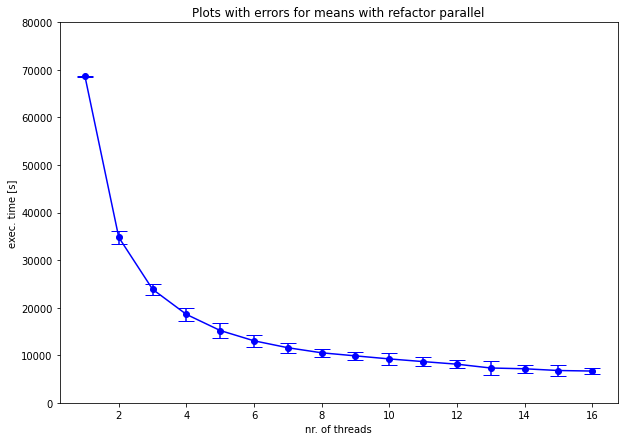

In [16]:
plt.figure(figsize=(10,7))
plt.title("Plots with errors for means with refactor parallel")
plt.xlabel("nr. of threads")
plt.ylabel("exec. time [s]")
plt.plot(threads,momR[:,0],color='b')
plt.ylim(0,80000)
plt.errorbar(threads,momR[:,0],yerr=momR[:,1],fmt='o',color='blue',capsize=8)

As we can observe the mean behaviour is very similar (even maybe a little smaller?) to the one of the naive algorithm. However as we can observe the std are so much smaller! This is perfect and it is exactly what we were hoping for. We can check that the total time is also diminished.

In [17]:
#Again, let's compute the means and the std associate to the total time of each run
maxsR = np.zeros((16,2),dtype=float)

maxsR[0][0] = MEAN_MAX(R1)
maxsR[1][0] = MEAN_MAX(R2)
maxsR[2][0] = MEAN_MAX(R3)
maxsR[3][0] = MEAN_MAX(R4)
maxsR[4][0] = MEAN_MAX(R5)
maxsR[5][0] = MEAN_MAX(R6)
maxsR[6][0] = MEAN_MAX(R7)
maxsR[7][0] = MEAN_MAX(R8)
maxsR[8][0] = MEAN_MAX(R9)
maxsR[9][0] = MEAN_MAX(R10)
maxsR[10][0] = MEAN_MAX(R11)
maxsR[11][0] = MEAN_MAX(R12)
maxsR[12][0] = MEAN_MAX(R13)
maxsR[13][0] = MEAN_MAX(R14)
maxsR[14][0] = MEAN_MAX(R15)
maxsR[15][0] = MEAN_MAX(R16)

maxsR[0][1] = STD_MAX(R1)
maxsR[1][1] = STD_MAX(R2)
maxsR[2][1] = STD_MAX(R3)
maxsR[3][1] = STD_MAX(R4)
maxsR[4][1] = STD_MAX(R5)
maxsR[5][1] = STD_MAX(R6)
maxsR[6][1] = STD_MAX(R7)
maxsR[7][1] = STD_MAX(R8)
maxsR[8][1] = STD_MAX(R9)
maxsR[9][1] = STD_MAX(R10)
maxsR[10][1] = STD_MAX(R11)
maxsR[11][1] = STD_MAX(R12)
maxsR[12][1] = STD_MAX(R13)
maxsR[13][1] = STD_MAX(R14)
maxsR[14][1] = STD_MAX(R15)
maxsR[15][1] = STD_MAX(R16)

<ErrorbarContainer object of 3 artists>

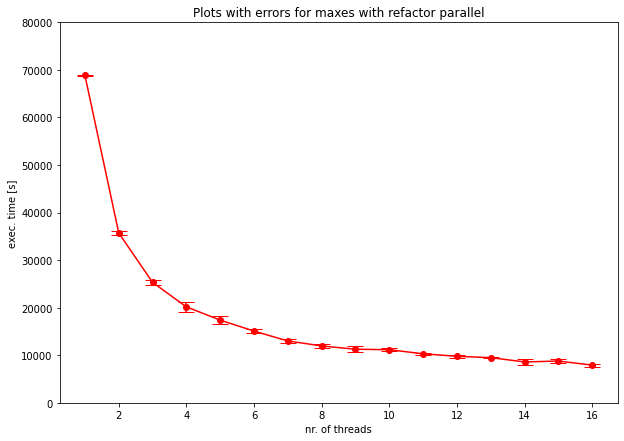

In [18]:
plt.figure(figsize=(10,7))
plt.title("Plots with errors for maxes with refactor parallel")
plt.xlabel("nr. of threads")
plt.ylabel("exec. time [s]")
plt.plot(threads,maxsR[:,0],color='r')
plt.ylim(0,80000)
plt.errorbar(threads,maxsR[:,0],yerr=maxsR[:,1],fmt='o',color='red',capsize=8)

At a first glance, they seem very similar but the best way is to check the comparison.

<ErrorbarContainer object of 3 artists>

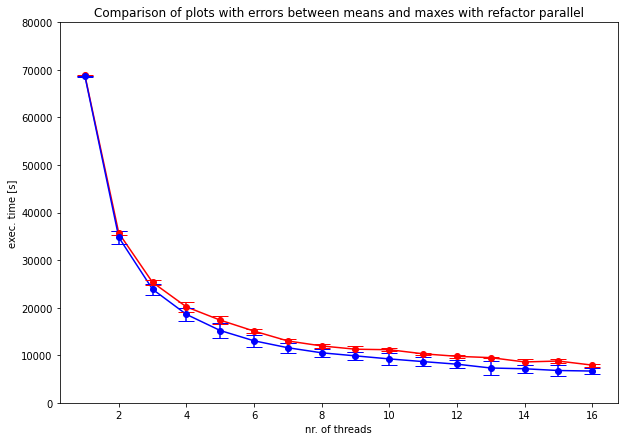

In [19]:
plt.figure(figsize=(10,7))
plt.title("Comparison of plots with errors between means and maxes with refactor parallel")
plt.xlabel("nr. of threads")
plt.ylabel("exec. time [s]")
plt.plot(threads,maxsR[:,0],color='r')
plt.plot(threads,momR[:,0],color='b')
plt.ylim(0,80000)
plt.errorbar(threads,maxsR[:,0],yerr=maxsR[:,1],fmt='o',color='red',capsize=8)
plt.errorbar(threads,momR[:,0],yerr=momR[:,1],fmt='o',color='blue',capsize=8)

Yes, they are! This algorithm has solve our problem. Now the threads have almost the same work load and with this the total time to compute the task has been strongly reduced with increasing number of threads. Therefore this algorithm has improved our strong scalability!

# COMPARISONS

We can perform some other comparison to obtain some extra information.

<ErrorbarContainer object of 3 artists>

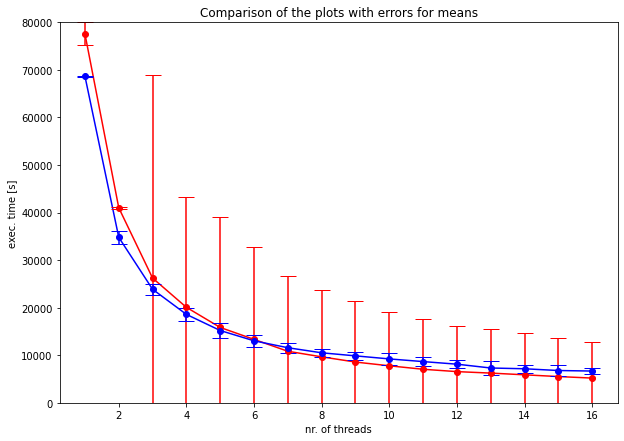

In [20]:
plt.figure(figsize=(10,7))
plt.title("Comparison of the plots with errors for means")
plt.xlabel("nr. of threads")
plt.ylabel("exec. time [s]")
plt.plot(threads,mom[:,0],color='r')
plt.plot(threads,momR[:,0],color='b')
plt.ylim(0,80000)
plt.errorbar(threads,mom[:,0],yerr=mom[:,1],fmt='o',color='red',capsize=8)
plt.errorbar(threads,momR[:,0],yerr=momR[:,1],fmt='o',color='blue',capsize=8)

Plotting the two mean lines we can see that the mean execution time of each thread it is, in fact, very similar even if with very different std.

<ErrorbarContainer object of 3 artists>

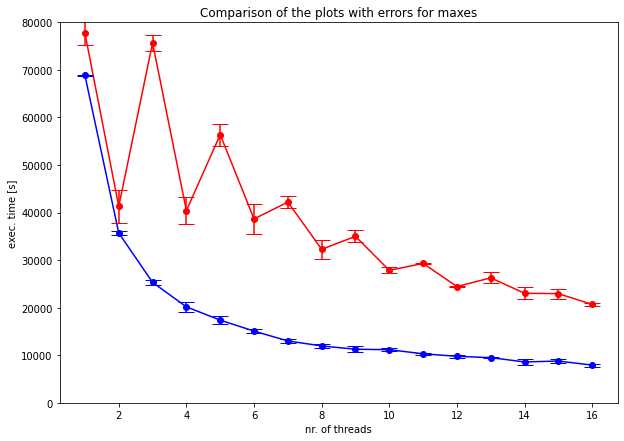

In [21]:
plt.figure(figsize=(10,7))
plt.title("Comparison of the plots with errors for maxes")
plt.xlabel("nr. of threads")
plt.ylabel("exec. time [s]")
plt.plot(threads,maxs[:,0],color='r')
plt.plot(threads,maxsR[:,0],color='b')
plt.ylim(0,80000)
plt.errorbar(threads,maxs[:,0],yerr=maxs[:,1],fmt='o',color='red',capsize=8)
plt.errorbar(threads,maxsR[:,0],yerr=maxsR[:,1],fmt='o',color='blue',capsize=8)

The total times are, on the other hand, quite different showing us how much the second algorithm is far better optimized in term of strong scalability than the first one.

# RESIDUALS

A final interesting thing to take a look are the residuals. We have recorded the execution time of each thread but also the time for the whole process to take place. Finding the maximum in the threads' times and making the difference with the total time can give us an approximation of the time used by the serial computations, preprocessings and saving processes. This is quite important in particular for the second algorithm where we have a work distribution method based on the random number generation which can be quite time consuming. 

We start this analysis defining a function to compute this residuals:

In [22]:
def RESIDUAL(df):
    MM = np.zeros(df.shape[1],dtype=int) #Array of the maximum time used by a thread in the run

    for j in range(df.shape[1]):
        a = 0
        for i in range(df.shape[0]-1):
            if(int(df.iat[i,j])>a):
                a = int(df.iat[i,j])
        MM[j] = a
    
    for j in range(df.shape[1]): #Compute the residual for each run
        MM[j] = -(MM[j] - int(df.iat[-1,j]))
        
    #return the mean residual time and std
    return np.mean(MM),np.std(MM)

In [23]:
#Compute the residuals for the naive algorithm
res = np.zeros((16,2),dtype=float)

res[0][0],res[0][1] = RESIDUAL(P1)
res[1][0],res[1][1] = RESIDUAL(P2)
res[2][0],res[2][1] = RESIDUAL(P3)
res[3][0],res[3][1] = RESIDUAL(P4)
res[4][0],res[4][1] = RESIDUAL(P5)
res[5][0],res[5][1] = RESIDUAL(P6)
res[6][0],res[6][1] = RESIDUAL(P7)
res[7][0],res[7][1] = RESIDUAL(P8)
res[8][0],res[8][1] = RESIDUAL(P9)
res[9][0],res[9][1]= RESIDUAL(P10)
res[10][0],res[10][1] = RESIDUAL(P11)
res[11][0],res[11][1] = RESIDUAL(P12)
res[12][0],res[12][1] = RESIDUAL(P13)
res[13][0],res[13][1] = RESIDUAL(P14)
res[14][0],res[14][1] = RESIDUAL(P15)
res[15][0],res[15][1] = RESIDUAL(P16)

<ErrorbarContainer object of 3 artists>

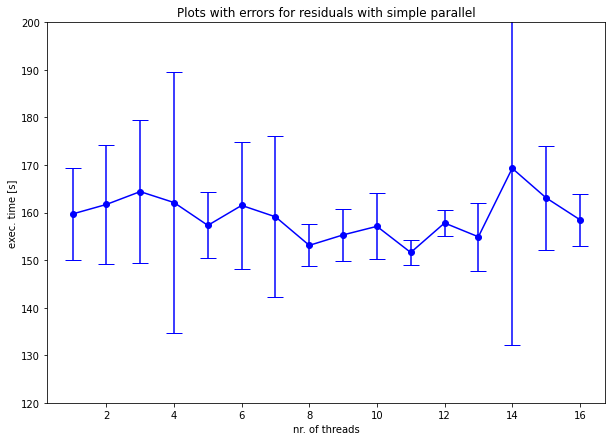

In [24]:
#And plot them
plt.figure(figsize=(10,7))
plt.title("Plots with errors for residuals with simple parallel")
plt.xlabel("nr. of threads")
plt.ylabel("exec. time [s]")
plt.plot(threads,res[:,0],color='b')
plt.ylim(120,200)
plt.errorbar(threads,res[:,0],yerr=res[:,1],fmt='o',color='blue',capsize=8)

As we can observe, the residual time does not depend on the number of threads in anyway and it is almost constant. The value is around 160 ms. 

Now, let's compute the residual for the refactor algorithm:

In [25]:
resR = np.zeros((16,2),dtype=float)

resR[0][0],resR[0][1] = RESIDUAL(R1)
resR[1][0],resR[1][1] = RESIDUAL(R2)
resR[2][0],resR[2][1] = RESIDUAL(R3)
resR[3][0],resR[3][1] = RESIDUAL(R4)
resR[4][0],resR[4][1] = RESIDUAL(R5)
resR[5][0],resR[5][1] = RESIDUAL(R6)
resR[6][0],resR[6][1] = RESIDUAL(R7)
resR[7][0],resR[7][1] = RESIDUAL(R8)
resR[8][0],resR[8][1] = RESIDUAL(R9)
resR[9][0],resR[9][1]= RESIDUAL(R10)
resR[10][0],resR[10][1] = RESIDUAL(R11)
resR[11][0],resR[11][1] = RESIDUAL(R12)
resR[12][0],resR[12][1] = RESIDUAL(R13)
resR[13][0],resR[13][1] = RESIDUAL(R14)
resR[14][0],resR[14][1] = RESIDUAL(R15)
resR[15][0],resR[15][1] = RESIDUAL(R16)

<ErrorbarContainer object of 3 artists>

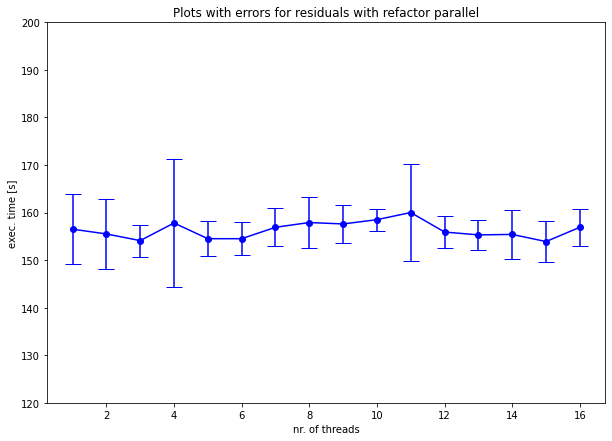

In [26]:
plt.figure(figsize=(10,7))
plt.title("Plots with errors for residuals with refactor parallel")
plt.xlabel("nr. of threads")
plt.ylabel("exec. time [s]")
plt.plot(threads,resR[:,0],color='b')
plt.ylim(120,200)
plt.errorbar(threads,resR[:,0],yerr=resR[:,1],fmt='o',color='blue',capsize=8)

Again the residual time is still almost constant and it is around the naive one! This is quite unexpected because we are generating random number to perform this and the preprocessing is made by a single thread! We can try to explain this behaviour:

- In the second algorithm we are generating random number however there are some characteristics of our simulations that could have influeced this numbers. In the simulations we where performing the algorithm on a grid in the region $[-2.75,1.25]\times[-2,2]$ with 1600 intervals along each axis. Thus, we have 1600 rows. Now the random sorting is made in an efficient way assigning to each row a thread and not vice versa (more time consuming). This method needs only 1600 random number generation and, considering some optimization surely present inside the native random number process of Python, it is a very small mass of numbers to generate. Maybe using a very narrow sampling (e.g. 100000 points) the contribution will become far more larger. On the other hand, a very narrow sampling has almost no sense if we think that the results of the algorithm should be transformed in an image.
- Secondly, the first algorithm express the domains in a very efficient way because we are setting and recording only the limits that can be computed with some simple algebraic operations so it is quite difficult to justify this comparable times hanging on this. Moreover, we are computing only the upper limit (the last row) of each thread domain because the lower is given by the upper limit of the previous thread. However, in the first algorithm we have split the domain computation between the threads so each one has to compute its own upper limit but this thread cannot exit the preprocessing until all the other threads have finished their job because the upper limit of the previous thread in ID-order is needed as lower limit. This necessary synchronization could have influenced the total time.  

We can notice also that the residual is more stable in this case than the previous one.

We have insert also the comparison between the two plots to observe better the characteristics

<ErrorbarContainer object of 3 artists>

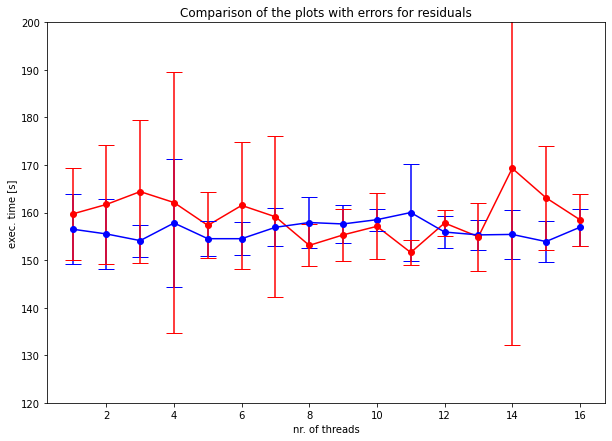

In [27]:
plt.figure(figsize=(10,7))
plt.title("Comparison of the plots with errors for residuals")
plt.xlabel("nr. of threads")
plt.ylabel("exec. time [s]")
plt.plot(threads,res[:,0],color='r')
plt.plot(threads,resR[:,0],color='b')
plt.ylim(120,200)
plt.errorbar(threads,resR[:,0],yerr=resR[:,1],fmt='o',color='blue',capsize=8)
plt.errorbar(threads,res[:,0],yerr=res[:,1],fmt='o',color='red',capsize=8)

Thus the strong scalability also of the preprocessing operations is good and the necessary time is almost the same in both algorithms for any number of threads fixed the size of the problem.